<a href="https://colab.research.google.com/github/aravind2060/100-days-of-machine-learning/blob/main/Information_based_learning_student_Part2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **DSBA 6165: Applied Machine Learning**

Professor: Rick Chakra

TA: Rebecca Jones

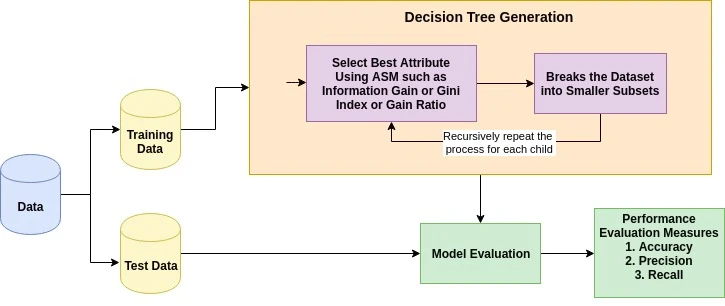

## Importing Required Libraries

Let's first load the required libraries.

In [ ]:
!pip install scikit-learn==1.5.2

# Load libraries
import pandas as pd
import numpy as np
import itertools
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn import datasets #Import scikit-learn dataset library
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.model_selection import GridSearchCV # Import for hyperparameter tuning
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation
from sklearn.metrics import confusion_matrix

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.3/13.3 MB 25.0 MB/s eta 0:00:00
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.6.1
    Uninstalling scikit-learn-1.6.1:
      Successfully uninstalled scikit-learn-1.6.1


## Loading Data
Let's first load the required Pima Indian Diabetes dataset using pandas' read CSV function. This time the data is imported through URL instead of last week where it was downloaded on Canvas

In [ ]:
col_names = ['pregnant', 'glucose', 'bp', 'skin', 'insulin', 'bmi', 'pedigree', 'age', 'label']
# load dataset
url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/pima-indians-diabetes.data.csv"
# Read csv, using url as file
diabetes = pd.read_csv(url, header=None, names=col_names)
#Look at top rows to insure it worked
diabetes.head()

pregnant  glucose  bp  skin  insulin   bmi  pedigree  age  label
0         6      148  72    35        0  33.6     0.627   50      1
1         1       85  66    29        0  26.6     0.351   31      0
2         8      183  64     0        0  23.3     0.672   32      1
3         1       89  66    23       94  28.1     0.167   21      0
4         0      137  40    35      168  43.1     2.288   33      1

## Basic EDA and statistical analysis

Let's start of with doing some basic EDA. This should be done every time you are opening a new data set. The only real steps for this is to look at the info to get information on nulls and to look at describe to get statistical information.


In [ ]:
# Print dataset info
diabetes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   pregnant  768 non-null    int64  
 1   glucose   768 non-null    int64  
 2   bp        768 non-null    int64  
 3   skin      768 non-null    int64  
 4   insulin   768 non-null    int64  
 5   bmi       768 non-null    float64
 6   pedigree  768 non-null    float64
 7   age       768 non-null    int64  
 8   label     768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


The main things to note from this are
1. No Null values
2. All variables are numbers

Now let's move on to the statistics

In [ ]:
# Dataset Statistics. We dont need include='all' as all of our variables are numbers!
diabetes.describe().T

count        mean         std     min       25%       50%  \
pregnant  768.0    3.845052    3.369578   0.000   1.00000    3.0000   
glucose   768.0  120.894531   31.972618   0.000  99.00000  117.0000   
bp        768.0   69.105469   19.355807   0.000  62.00000   72.0000   
skin      768.0   20.536458   15.952218   0.000   0.00000   23.0000   
insulin   768.0   79.799479  115.244002   0.000   0.00000   30.5000   
bmi       768.0   31.992578    7.884160   0.000  27.30000   32.0000   
pedigree  768.0    0.471876    0.331329   0.078   0.24375    0.3725   
age       768.0   33.240885   11.760232  21.000  24.00000   29.0000   
label     768.0    0.348958    0.476951   0.000   0.00000    0.0000   

                75%     max  
pregnant    6.00000   17.00  
glucose   140.25000  199.00  
bp         80.00000  122.00  
skin       32.00000   99.00  
insulin   127.25000  846.00  
bmi        36.60000   67.10  
pedigree    0.62625    2.42  
age        41.00000   81.00  
label       1.00000    1.00

The question creeping out of this summary is:

*Can minimum value of below listed columns be zero (0)?*

On these columns, a value of zero does not make sense and thus indicates missing value.

Following columns or variables have an invalid zero value:

* Glucose
* BloodPressure
* SkinThickness
* Insulin
* BMI

It is better to replace zeros with nan since after that counting them would be easier and zeros need to be replaced with suitable values. Since we are going to be heavily messing with the dataset let's make a copy so the original data isn't altered

In [ ]:
# Create a deep copy of your dataset
diabetes_copy = diabetes.copy(deep = True)

# Replace the missing values
diabetes_copy[['glucose','bp','skin','insulin','bmi']] = diabetes_copy[['glucose','bp','skin','insulin','bmi']].replace(0,np.NaN)

# Check for missing values
print(diabetes_copy.isnull().sum())

pregnant      0
glucose       5
bp           35
skin        227
insulin     374
bmi          11
pedigree      0
age           0
label         0
dtype: int64


For the sake of time let's fill all of the new null values with the median for the variable.

**DON'T USE EASY FIXES LIKE THIS FOR PROJECT**

In [ ]:
# Impute missing values with the median
diabetes_copy.fillna(diabetes_copy.median(), inplace=True)

diabetes_copy.describe().T

count        mean        std     min        25%       50%  \
pregnant  768.0    3.845052   3.369578   0.000    1.00000    3.0000   
glucose   768.0  121.656250  30.438286  44.000   99.75000  117.0000   
bp        768.0   72.386719  12.096642  24.000   64.00000   72.0000   
skin      768.0   29.108073   8.791221   7.000   25.00000   29.0000   
insulin   768.0  140.671875  86.383060  14.000  121.50000  125.0000   
bmi       768.0   32.455208   6.875177  18.200   27.50000   32.3000   
pedigree  768.0    0.471876   0.331329   0.078    0.24375    0.3725   
age       768.0   33.240885  11.760232  21.000   24.00000   29.0000   
label     768.0    0.348958   0.476951   0.000    0.00000    0.0000   

                75%     max  
pregnant    6.00000   17.00  
glucose   140.25000  199.00  
bp         80.00000  122.00  
skin       32.00000   99.00  
insulin   127.25000  846.00  
bmi        36.60000   67.10  
pedigree    0.62625    2.42  
age        41.00000   81.00  
label       1.00000    1.00

## Feature Selection
Here, you need to divide given columns into two types of variables dependent (or target variable) and independent variable (or feature variables).

A capital X is used for the dependant variables while a lowercase y is used for the dependant. There is no reason for this other than conventional use in industry

In [ ]:
 #split dataset in features and target variable
feature_cols = ['pregnant', 'insulin', 'bmi', 'age','glucose','bp','pedigree']
# Features
X = diabetes_copy[feature_cols]
# Target variable
y = diabetes_copy.label

## Splitting Data

To understand model performance, dividing the dataset into a training set and a test set is a good strategy.

Let's split the dataset by using function train_test_split(). You need to pass 3 parameters features, target, and test_set size.

In [ ]:
# Split dataset into training set and test set, declare random state for repeatability
 # 70% training and 30% test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1, stratify=y)

What does stratified do?

In [ ]:
# y_train.value_counts()[0]

print('Train target split: ', str(y_train.value_counts()[1] / y_train.value_counts().sum()))
print('Test target split: ', str(y_test.value_counts()[1] / y_test.value_counts().sum()))


Train target split:  0.34823091247672255
Test target split:  0.35064935064935066


## Building Decision Tree Model [link](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html)

Let's create a Decision Tree Model using Scikit-learn. Many of the sklearn algorithms are implemented using the same standard steps:

Step 1: Initiate the algorithm. Define the parameters (& hyperparameters of the algorithm) of the algorithm. For example, the maximum depth, the minimum samples in a leaf etc. (check documentation for more information)

Step 2: Train the algorithm. Train the algorithm by fitting it to the X_train and y_train datasets.

Step 3: Evaluating the algorithm. Evaluate the predictive power of the algorithm by comparing the predicted target values to the true values. We can do this for the training and testing dataset.

In [ ]:
# Create Decision Tree classifer object
dt = DecisionTreeClassifier(random_state = 42)

# Train Decision Tree Classifer
dt = dt.fit(X_train,y_train)

# Predict the response for test and train dataset
y_pred = dt.predict(X_test)
y_pred_train = dt.predict(X_train)
# Model Accuracy, how often is the classifier correct?
print("Accuracy Test:",metrics.accuracy_score(y_test, y_pred))
# Check the accuracy for train
print("Accuracy Train:",metrics.accuracy_score(y_train, y_pred_train))

Accuracy Test: 0.7316017316017316
Accuracy Train: 1.0


A training accuracy of 1.0 means that the decision tree has perfectly memorized the training data. Every instance in the training set is correctly predicted by the fully grown tree.
The test accuracy is significantly lower (0.7229), indicating that the model does not generalize well to new, unseen data. The high training accuracy does not translate to good performance on data the model hasn't seen during training.

**Evaluation**

In [ ]:
from sklearn.metrics import f1_score, accuracy_score, precision_score, recall_score
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
cm=confusion_matrix(y_test,y_pred)
print(cm) # row: true labels, cols: predicted labels
f1 = f1_score(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)

# Print the metrics
print("F1 Score: ", np.round(f1,3))
print("Accuracy: ", np.round(accuracy,3))
print("Precision:", np.round(precision,3))
print("Recall:   ", np.round(recall,3))
tree_auc = roc_auc_score(y_test, dt.predict_proba(X_test)[:,1])
print("ROC AUC:", np.round(tree_auc,3))

[[120  30]
 [ 32  49]]
F1 Score:  0.612
Accuracy:  0.732
Precision: 0.62
Recall:    0.605
ROC AUC: 0.702


**Visualizing Decision the fully grown Trees**

You can use Scikit-learn's export_graphviz function for display the tree within a Jupyter notebook.

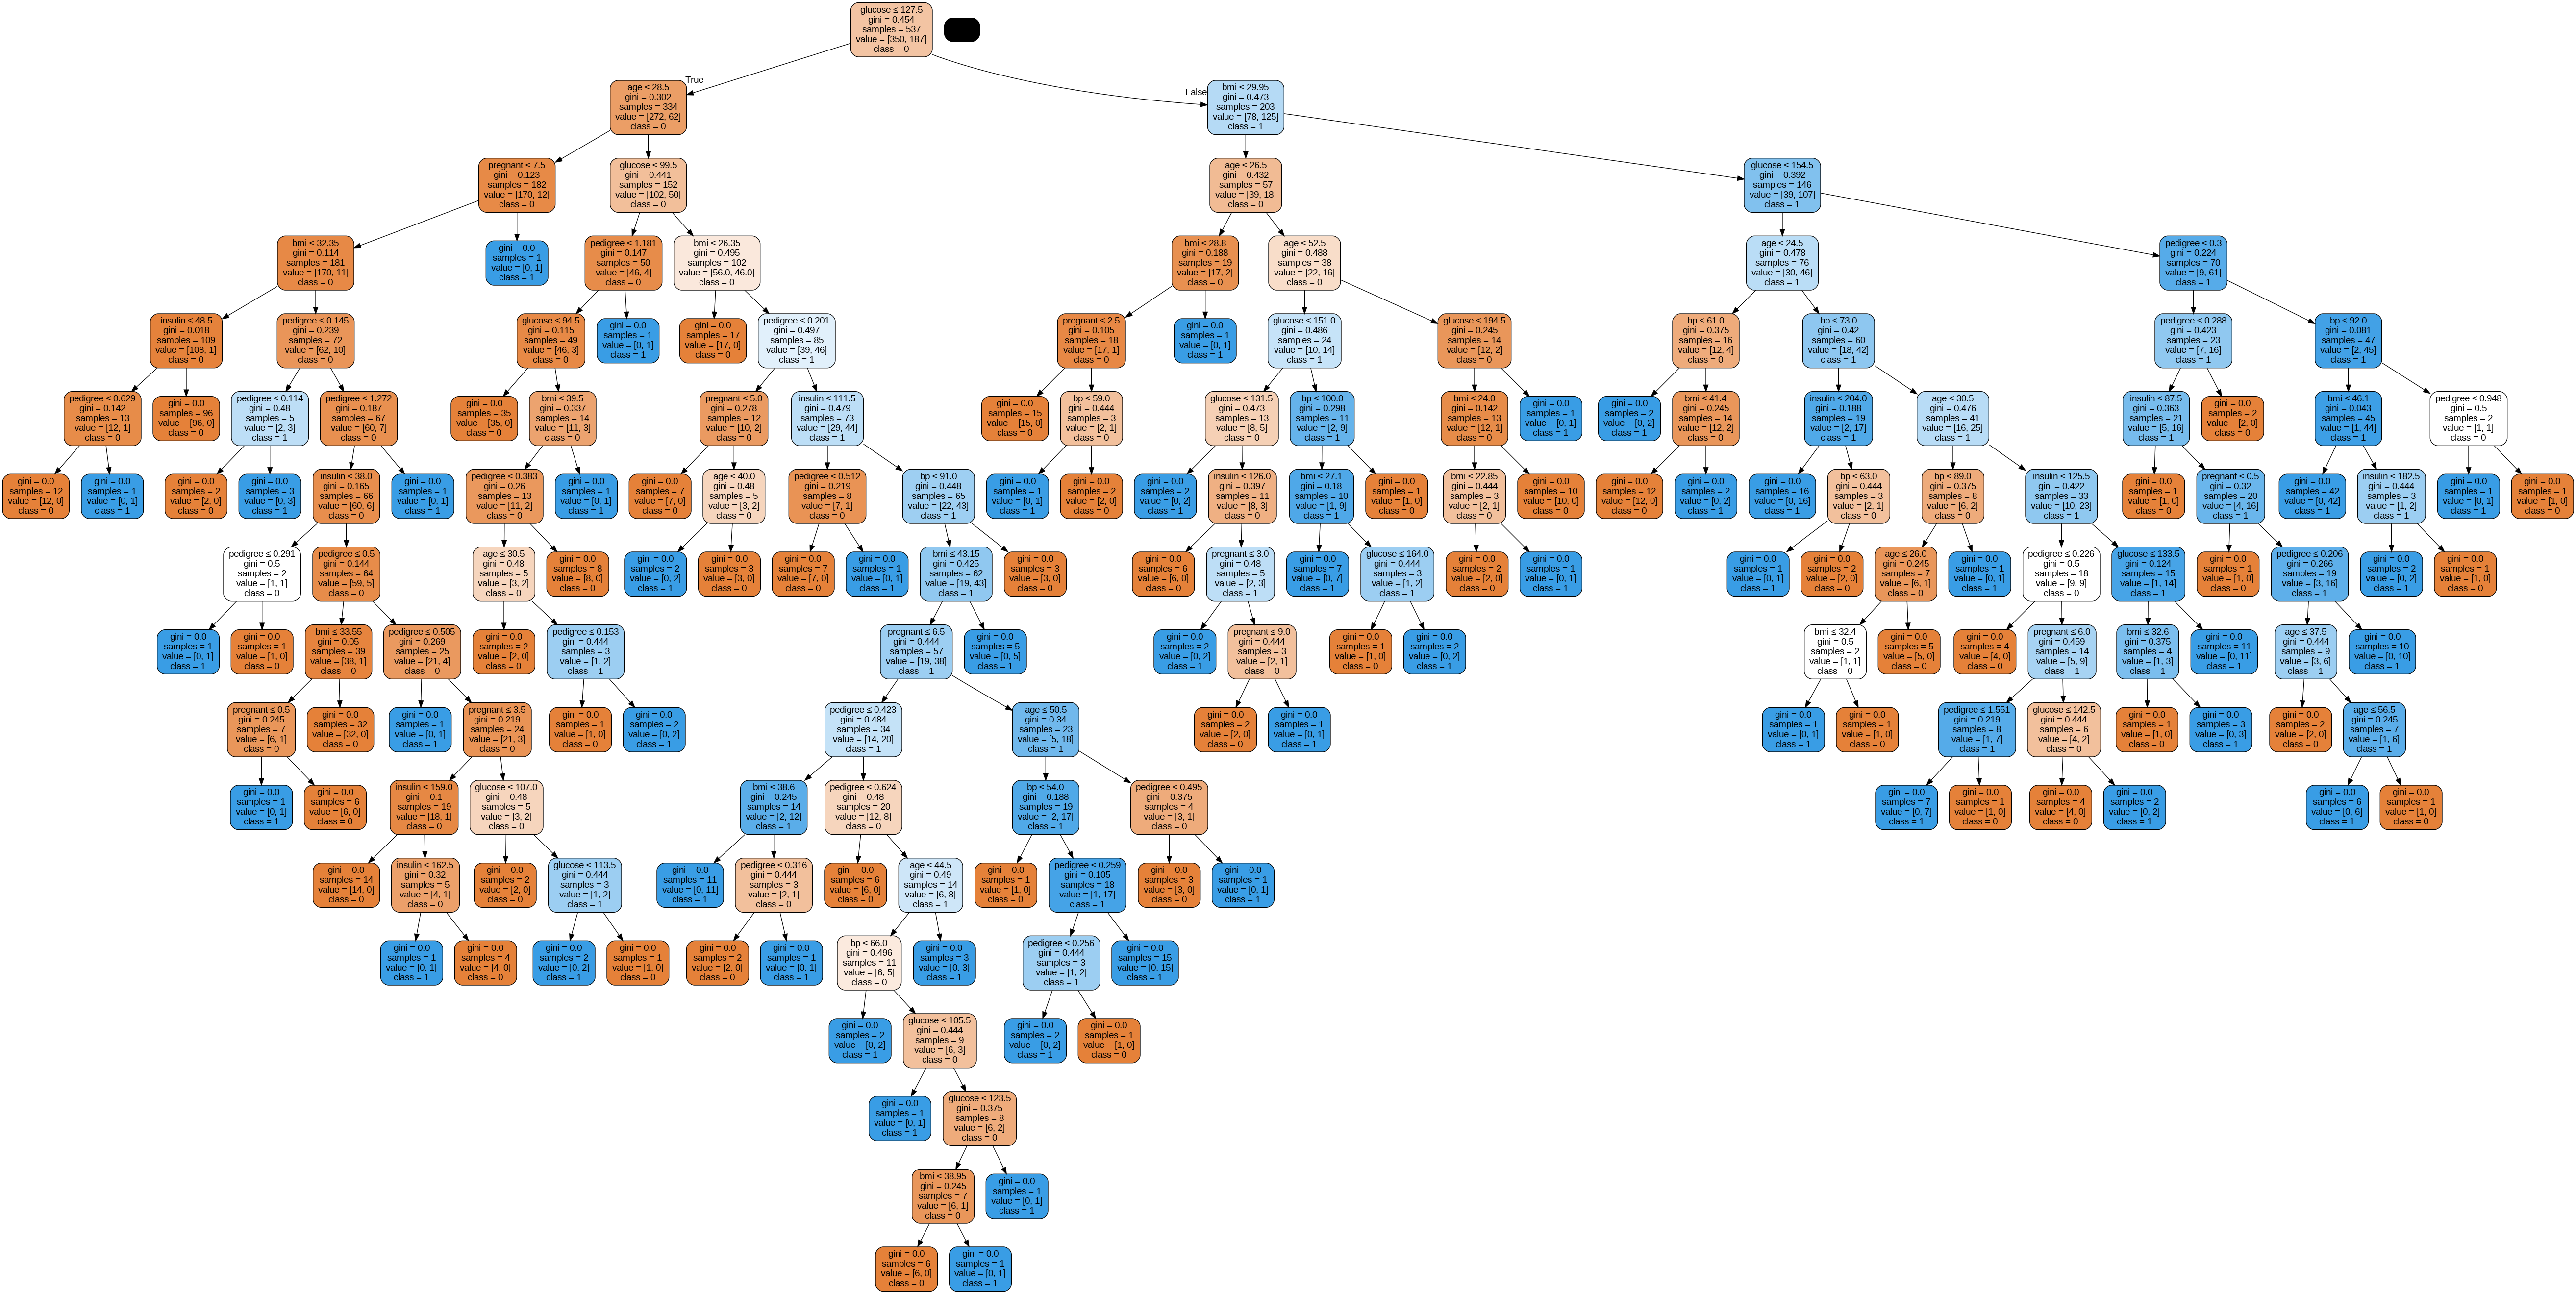

In [ ]:
#Import some additional libraries
from sklearn.tree import export_graphviz
from six import StringIO
from IPython.display import Image
import pydotplus

# Plot the decision tree
dot_data = StringIO()
export_graphviz(dt, out_file=dot_data,
                filled=True, rounded=True,
                special_characters=True,feature_names = feature_cols,class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
graph.write_png('diabetes.png')
Image(graph.create_png())

What's your first reaction when seeing this? Probably something along the lines of "I can't read this!"

This is due to the tree being unpruned. This unpruned tree is unexplainable, overfits, and not easy to understand. In the next section, let's optimize it by pruning.

## How can we enhance the generalization capability and interpretability of a Decision Tree?

**Answer: Tree Pruning**

In Scikit-learn, optimization of decision tree classifier is performed by only pre-pruning. Maximum depth of the tree can be used as a control variable for pre-pruning. In the following the example, you can plot a decision tree on the same data with max_depth=3. Here is a list of other pre-pruning parameters:

**criterion : optional (default=”gini”) or Choose attribute selection measure:** This parameter allows us to use the different-different attribute selection measure. Supported criteria are “gini” for the Gini index and “entropy” for the information gain.


**max_depth : int or None, optional (default=None) or Maximum Depth of a Tree:** The maximum depth of the tree. If None, then nodes are expanded until all the leaves contain less than min_samples_split samples. The higher value of maximum depth causes overfitting, and a lower value causes underfitting.

In [ ]:
# Create Decision Tree classifer object use a different name here. This allows for previous model to be called upon if were to need it.
#Set the hyperparamaneter max_depth=3 and see how the test and train accuracy changes.

dt2 = DecisionTreeClassifier(criterion="entropy", max_depth=3,
                             random_state = 1)

# Train Decision Tree Classifer
dt2 = dt2.fit(X_train,y_train)

y_pred = dt2.predict(X_test)
y_pred_train = dt2.predict(X_train)
# Model Accuracy, how often is the classifier correct?
print("Accuracy Test:",metrics.accuracy_score(y_test, y_pred))
# Check the accuracy for train
print("Accuracy Train:",metrics.accuracy_score(y_train, y_pred_train))

Accuracy Test: 0.7532467532467533
Accuracy Train: 0.7783985102420856


Well, the classification rate increased to 71.8 which is better accuracy than the previous model and it is generalizing better.

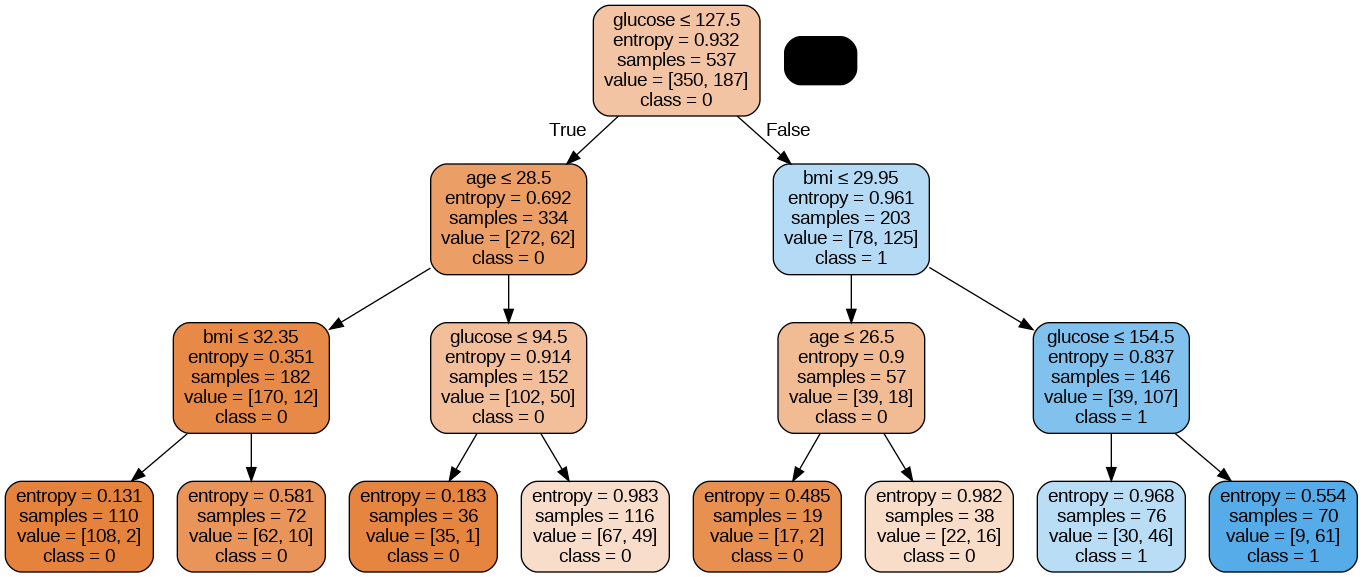

In [ ]:
# Plot the decision tree (copy from prior code switching out dt for dt2)
dot_data = StringIO()
export_graphviz(dt2, out_file=dot_data,
                filled=True, rounded=True,
                special_characters=True, feature_names = feature_cols,class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
graph.write_png('diabetes.png')
Image(graph.create_png())

This pruned model is less complex, explainable, and easy to understand than the previous decision tree model plot. In addition, it should generalize better.

# How to find the best values of hyperparameters? Grid Search

Instead of doing hyperparameter tuning manually, the GridSearchCV function from the sklearn.model_selection library is used to perform an automated grid search for hyperparameter tuning in the Decision Tree model. The param_grid argument defines the hyperparameters to be tuned and the values to be tried. The cv argument sets the number of folds for cross-validation. The fit function is used to fit the model to the data, and the best_params_ and best_score_ attributes are used to get the best hyperparameters and best score, respectively.

The Decision Tree model is defined with the DecisionTreeClassifier class from the sklearn.tree library, and the hyperparameters to be tuned are max_depth, min_samples_split, and min_samples_leaf. The values to be tried for each hyperparameter are specified in the param_grid dictionary. The grid search performs a 10-fold cross-validation, and the best hyperparameters and best score are printed.

In [ ]:
# Define the Decision Tree model
model = DecisionTreeClassifier(random_state = 42)

# Define the hyperparameters to be tuned
param_grid = {'criterion': ['gini', 'entropy'],
              'max_depth': [2, 3, 4],
              'min_samples_split': [2, 3, 4, 5, 6, 7],
              'min_samples_leaf': [1, 2, 3, 4, 5, 6, 7]}

# Perform grid search
grid = GridSearchCV(model, param_grid, cv=5)
grid.fit(X_train, y_train)

# Print the best parameters and best score
print("Best parameters:", grid.best_params_)
print("Best score:", grid.best_score_)

# Extract best model and evaluate it on test set
best_model = grid.best_estimator_
print("Accuracy of best decision tree: ", best_model.score(X_test, y_test))


Best parameters: {'criterion': 'entropy', 'max_depth': 3, 'min_samples_leaf': 1, 'min_samples_split': 2}
Best score: 0.7431810314987886
Accuracy of best decision tree:  0.7532467532467533


/usr/local/lib/python3.11/dist-packages/numpy/ma/core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


Automated hyperparameter search identified best params (in agreement with what we found earlier), without manual trial and error.

### Pros
* Decision trees are easy to interpret and visualize.
* It can easily capture Non-linear patterns.
* It requires fewer data preprocessing from the user, for example, there is no need to normalize columns.
* It can be used for feature engineering such as predicting missing values, suitable for variable selection.
* The decision tree has no assumptions about distribution because of the non-parametric nature of the algorithm.

### Cons
* Sensitive to noisy data. It can overfit noisy data.
* The small variation(or variance) in data can result in the different decision tree. This can be reduced by bagging and boosting algorithms.
* Decision trees are biased with imbalance dataset, so it is recommended that balance out the dataset before creating the decision tree.

## Random Forest Classifier [Link](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html)

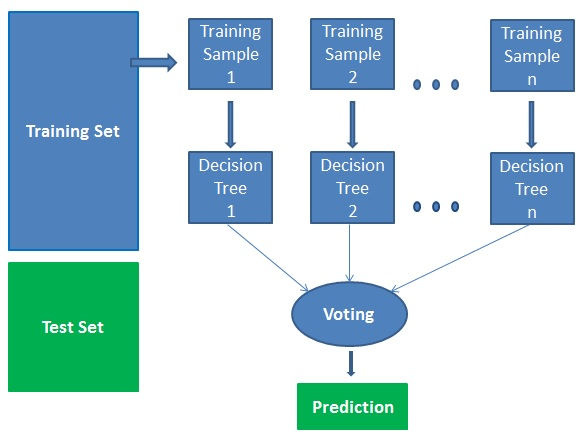

You will be building a model on the diabetes data again! No need to rexplore data as we already did that!

After splitting, you will train the model on the training set and perform predictions on the test set.

In [ ]:
#Import Random Forest Function
from sklearn.ensemble import RandomForestClassifier

# Create a Random Forest Classifier
rf=RandomForestClassifier(n_estimators=100,random_state=42)

#n_estimators: Number of trees in the forest

# Train the model using the training set
rf.fit(X_train,y_train)

# Predict obs in test set
y_pred_rf=rf.predict(X_test)
y_pred_train_rf=rf.predict(X_train)

After training, check the accuracy using actual and predicted values.

In [ ]:
# Model Accuracy, how often is the classifier correct?
print("Accuracy Test:",metrics.accuracy_score(y_test, y_pred_rf))
# Check the accuracy for train
print("Accuracy Train:",metrics.accuracy_score(y_train, y_pred_train_rf))

Accuracy Test: 0.7445887445887446
Accuracy Train: 1.0


Model is clearly overfit. We need to set the hyperparameters.

n_estimator,max_features,max_depth,bootstrap etc.

In [ ]:
#Hyperparameter Tuning.
rfc=RandomForestClassifier(random_state=42)
param_grid = {
    'n_estimators': [1, 5, 10, 20, 50, 100, 150, 200, 300],
    'max_features': ['sqrt', 'log2'],
    'max_depth' : [2,3]
}
CV_rfc = GridSearchCV(estimator=rfc, param_grid=param_grid, cv= 4)
CV_rfc.fit(X_train, y_train)
CV_rfc.best_params_

/usr/local/lib/python3.11/dist-packages/numpy/ma/core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


{'max_depth': 3, 'max_features': 'sqrt', 'n_estimators': 200}

In [ ]:
# Create a Random Forest Classifier
rf1=RandomForestClassifier(n_estimators=200,max_depth=3, max_features='sqrt',random_state=42)
#n_estimators: Number of trees in the forest

# Train the model using the training set
rf1.fit(X_train,y_train)

# Predict obs in test set
y_pred_rf1=rf1.predict(X_test)
y_pred_train_rf1=rf1.predict(X_train)
# Model Accuracy, how often is the classifier correct?
print("Accuracy Test:",metrics.accuracy_score(y_test, y_pred_rf1))
# Model Accuracy, how often is the classifier correct?
print("Accuracy Train:",metrics.accuracy_score(y_train, y_pred_train_rf1))

Accuracy Test: 0.7186147186147186
Accuracy Train: 0.8100558659217877


In [ ]:
from sklearn.metrics import f1_score, accuracy_score, precision_score, recall_score
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
cm=confusion_matrix(y_test,y_pred_rf1)
print(cm)
f1 = f1_score(y_test, y_pred_rf1)
accuracy = accuracy_score(y_test, y_pred_rf1)
precision = precision_score(y_test, y_pred_rf1)
recall = recall_score(y_test, y_pred_rf1)

# Print the metrics
print("F1 Score: ", np.round(f1,3))
print("Accuracy: ", np.round(accuracy,3))
print("Precision:", np.round(precision,3))
print("Recall:   ", np.round(recall,3))
tree_auc = roc_auc_score(y_test, rf1.predict_proba(X_test)[:,1])
print("ROC AUC:", np.round(tree_auc,3))

[[133  17]
 [ 48  33]]
F1 Score:  0.504
Accuracy:  0.719
Precision: 0.66
Recall:    0.407
ROC AUC: 0.807


For our understanding, Lets try to plot accuracy vs estimators. How does the performance vary with increase in n_estimators

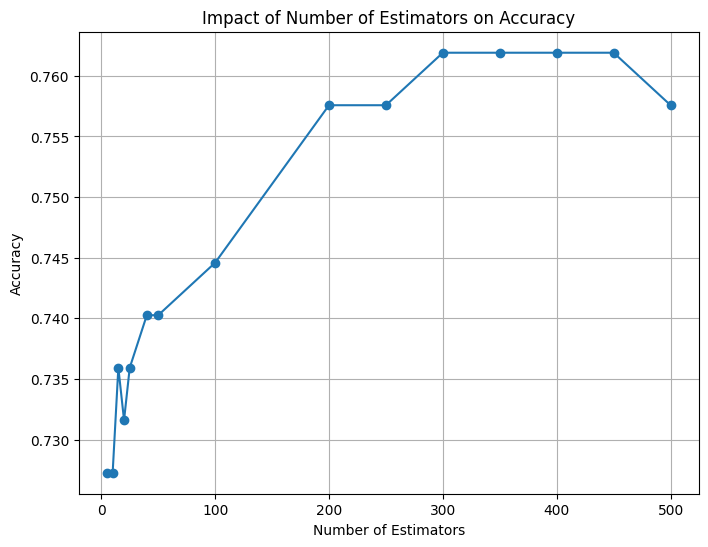

In [ ]:
num_estimators_list = [5,10,15,20,25,40, 50, 100, 200,250,300,350,400,450,500]

# Initialize lists to store results
accuracy_results = []

# Iterate over different values of n_estimators
for num_estimators in num_estimators_list:
    # Create a Random Forest classifier
    rf_classifier = RandomForestClassifier(n_estimators=num_estimators,max_features='sqrt',random_state=42)

    # Fit the classifier to the training data
    rf_classifier.fit(X_train, y_train)

    # Make predictions on the test data
    y_pred = rf_classifier.predict(X_test)

    # Calculate accuracy and store in the list
    accuracy = accuracy_score(y_test, y_pred)
    accuracy_results.append(accuracy)

# Plotting
plt.figure(figsize=(8, 6))
plt.plot(num_estimators_list, accuracy_results, marker='o')
plt.xlabel('Number of Estimators')
plt.ylabel('Accuracy')
plt.title('Impact of Number of Estimators on Accuracy')
plt.grid(True)
plt.show()

**Check the individual Trees** in RF

Tree 0


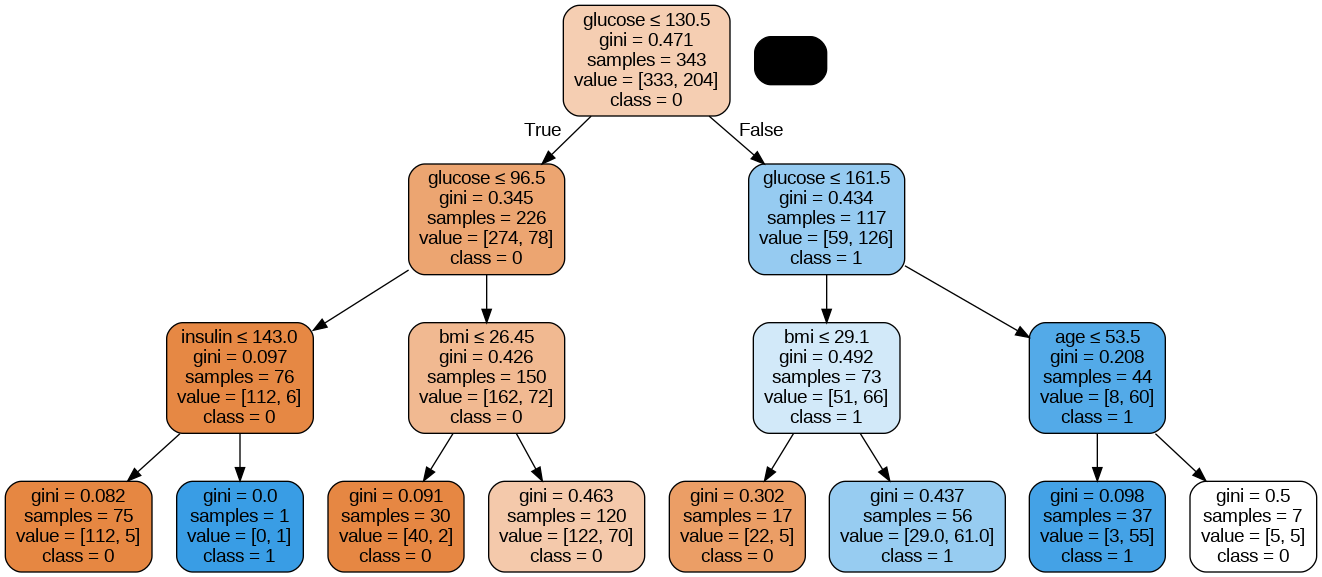

Tree 1


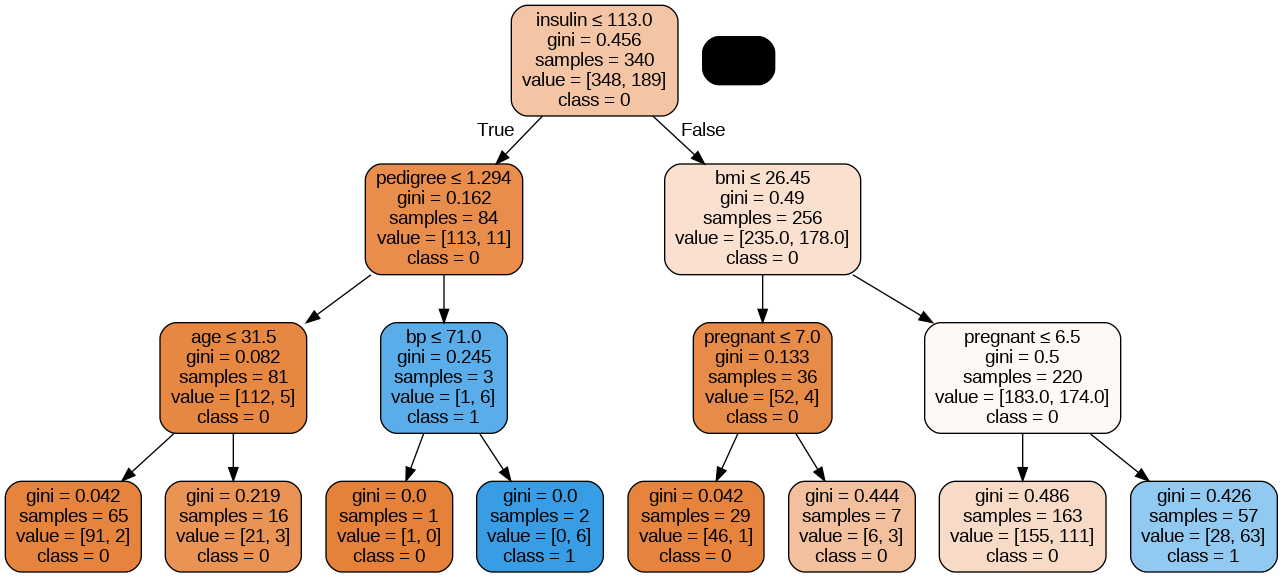

Tree 2


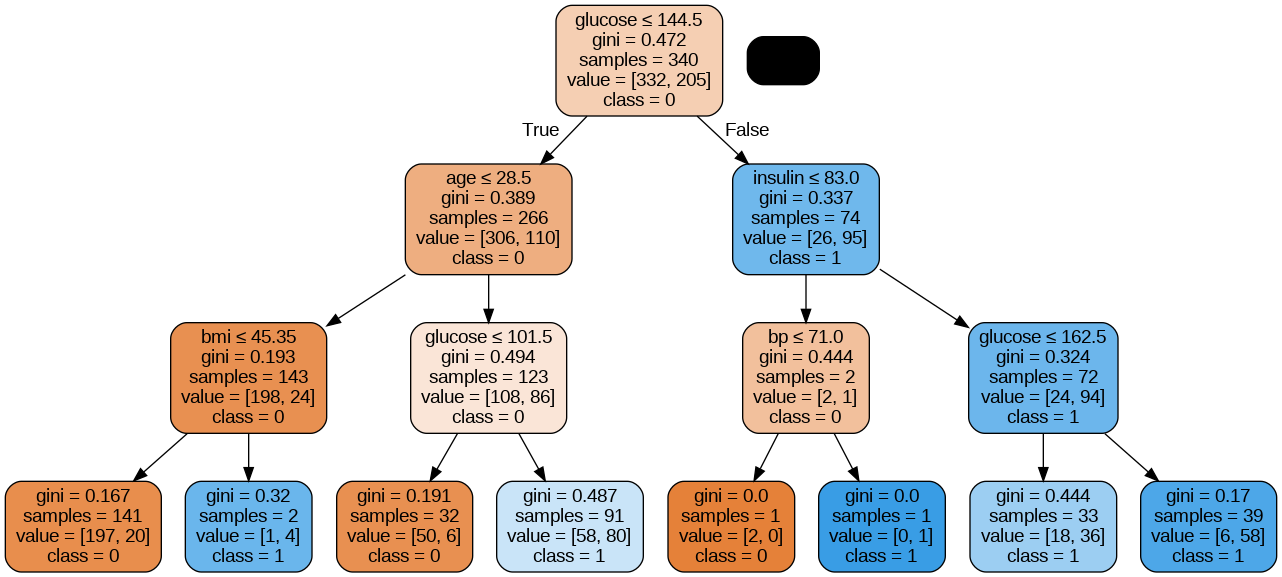

In [ ]:
#Plot individual trees in random forest.


num_trees_to_plot = 3

for i in range(num_trees_to_plot):
    # Plot individual trees and save as PNG
    dot_data = StringIO()
    export_graphviz(rf1.estimators_[i]
                    , out_file=dot_data,
                  filled=True, rounded=True,
                   special_characters=True, feature_names = feature_cols,class_names=['0','1'])

    graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
    graph.write_png(f'diabetes_tree_{i+1}.png')
    print(f'Tree {i}')
    # Display the plot
    display(Image(graph.create_png()))

Tree 0 Uses Glucose, bmi, pregnant and bp

Tree 1 uses insulin, bp, bmi, pregnant , age

**Random selection of both variables (features) and the creation of individual trees. This randomness is a key aspect of the algorithm and contributes to the overall effectiveness of Random Forests.**



You can also make a prediction for a single item, for example:

* pregnant = 0
* glucose = 115
* bp = 81
* insulin = 133
* bmi = 33
* pedigree = 0.3
* age = 31

Now you can predict which type of flower it is.
Below is the order of the variables from the split earlier in the lab

['pregnant', 'insulin', 'bmi', 'age','glucose','bp','pedigree']

In [ ]:
feature_names = ['pregnant', 'insulin', 'bmi', 'age', 'glucose', 'bp', 'pedigree']
prediction_data = pd.DataFrame([[0, 133, 33, 31, 115, 81, 0.3]], columns=feature_names)

# Make predictions
predictions = rf1.predict(prediction_data)
print(predictions)
print(rf1.predict_proba(prediction_data))

[0]
[[0.58863648 0.41136352]]


Here, 0 indicates not diabetic

## Finding Important Features in Scikit-learn

Here, you are finding important features or selecting features in the diabetes dataset. In scikit-learn, you can perform this task in the following steps:

* First, you need to create a random forests model.
* Second, use the feature importance variable to see feature importance scores.
* Third, visualize these scores using the seaborn library.

**The feature importance in Random Forest is calculated based on how much each feature contributes to reducing impurity or error in the decision trees. Features that are frequently used for splitting nodes across multiple trees and lead to more significant reductions in impurity are considered more important.**

In [ ]:
#Look at feature importance
feature_imp = pd.Series(rf1.feature_importances_,index=feature_cols).sort_values(ascending=False)
#Display feature importance
feature_imp

glucose     0.371601
bmi         0.163250
age         0.163107
insulin     0.122988
pregnant    0.074884
pedigree    0.073113
bp          0.031056
dtype: float64

You can also visualize the feature importance. Visualizations are easy to understand and interpretable.

For visualization, you can use a combination of matplotlib and seaborn. Because seaborn is built on top of matplotlib, it offers a number of customized themes and provides additional plot types. Matplotlib is a superset of seaborn and both are equally important for good visualizations.

<ipython-input-41-07457e9f4e25>:8: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


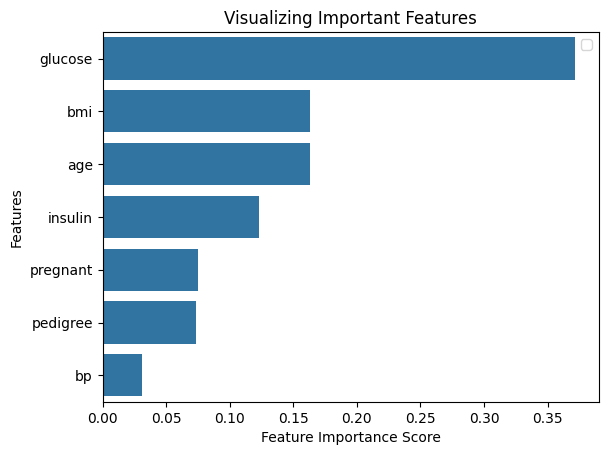

In [ ]:
%matplotlib inline
# Creating a bar plot
sns.barplot(x=feature_imp, y=feature_imp.index)
# Add labels to your graph
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.legend()
plt.show()


Feature importance helps in selecting the most relevant features for a predictive model. By identifying and focusing on the most important features, you can simplify your model and potentially improve its interpretability.
Feature importance in a Random Forest model provides a means to simplify the model and enhance interpretability.
For instance, variables with importance values below a certain threshold, such as <0.1, can be considered less influential and potentially removed. In scenarios where the model is intricate and involves a large number of variables, feature selection based on importance scores becomes a valuable strategy to reduce complexity and improve model understanding.

# Adaboost classifier

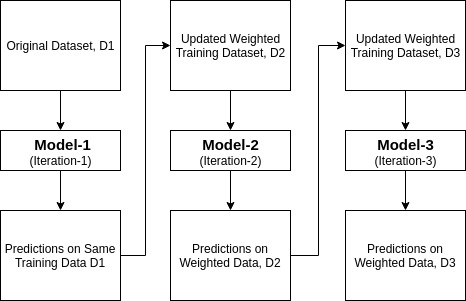

## Importing Required Libraries
Let's first load the required libraries.

In [ ]:
# Load library
from sklearn.ensemble import AdaBoostClassifier

## Building the AdaBoost Model

Let's create the AdaBoost Model using Scikit-learn. AdaBoost uses Decision Tree Classifier as default Classifier.

In [ ]:
# Create adaboost classifer object
abc = AdaBoostClassifier(n_estimators=10,
                         learning_rate=1, random_state=1)
# Train Adaboost Classifer
model = abc.fit(X_train, y_train)

#Predict the response for test dataset
y_pred = model.predict(X_test)

/usr/local/lib/python3.11/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


"The most important parameters are base_estimator, n_estimators, and learning_rate." (Adaboost Classifier, Chris Albon)

+ **base_estimator:** It is a weak learner used to train the model. It uses DecisionTreeClassifier as default weak learner for training purpose. You can also specify different machine learning algorithms.
+ **n_estimators:** Number of weak learners to train iteratively.
+ **learning_rate:** It contributes to the weights of weak learners. It uses 1 as a default value.

## Evaluate Model

Let's estimate, how accurately the classifier or model can predict the type of cultivars.

Accuracy can be computed by comparing actual test set values and predicted values.

In [ ]:
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.7359307359307359


In [ ]:
from sklearn.metrics import f1_score, accuracy_score, precision_score, recall_score
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
cm=confusion_matrix(y_test,y_pred)
print(cm)
f1 = f1_score(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)

# Print the metrics
print("F1 Score: ", np.round(f1,3))
print("Accuracy: ", np.round(accuracy,3))
print("Precision:", np.round(precision,3))
print("Recall:   ", np.round(recall,3))
tree_auc = roc_auc_score(y_test, model.predict_proba(X_test)[:,1])
print("ROC AUC:", np.round(tree_auc,3))

[[121  29]
 [ 32  49]]
F1 Score:  0.616
Accuracy:  0.736
Precision: 0.628
Recall:    0.605
ROC AUC: 0.791


In [ ]:
# explore model attributes

print('\nBase Estimator')
display(abc.estimator_)
print('\nEstimators')
display(abc.estimators_)
print('\nEstimator Weights')
display(abc.estimator_weights_)
print('\nEstimator Errors')
display(abc.estimator_errors_)
print('\nFeature Importance')
display(abc.feature_importances_)


Base Estimator


DecisionTreeClassifier(max_depth=1)


Estimators


[DecisionTreeClassifier(max_depth=1, random_state=1791095845),
 DecisionTreeClassifier(max_depth=1, random_state=2135392491),
 DecisionTreeClassifier(max_depth=1, random_state=946286476),
 DecisionTreeClassifier(max_depth=1, random_state=1857819720),
 DecisionTreeClassifier(max_depth=1, random_state=491263),
 DecisionTreeClassifier(max_depth=1, random_state=550290313),
 DecisionTreeClassifier(max_depth=1, random_state=1298508491),
 DecisionTreeClassifier(max_depth=1, random_state=2143362693),
 DecisionTreeClassifier(max_depth=1, random_state=630311759),
 DecisionTreeClassifier(max_depth=1, random_state=1013994432)]


Estimator Weights


array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])


Estimator Errors


array([0.26070764, 0.32579881, 0.35940967, 0.40880339, 0.39437405,
       0.45302848, 0.47880551, 0.47002941, 0.47488871, 0.45538114])


Feature Importance


array([0. , 0.2, 0.1, 0.3, 0.3, 0. , 0.1])

In [ ]:
# explore prediction outputs

model_predictions = np.zeros(shape=(1,10))

i = 0
for estimator in model.estimators_:
    # print(estimator.predict(X_test.iloc[0:1,:]))
    model_predictions[0][i] = estimator.predict(X_test.iloc[0:1,:])#0 vs 1
    i+=1

print("\nEnsemble Prediction")
print(model.predict(X_test.iloc[0:1,:]))

print("\nEstimator Prediction")
print(model_predictions)

print("\nEstimator Weights")
print(abc.estimator_weights_)



Ensemble Prediction
[1]

Estimator Prediction
[[1. 0. 1. 1. 0. 1. 1. 1. 0. 1.]]

Estimator Weights
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:486: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(
<ipython-input-48-6b7ff1272b84>:8: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  model_predictions[0][i] = estimator.predict(X_test.iloc[0:1,:])#0 vs 1
/usr/local/lib/python3.11/dist-packages/sklearn/base.py:486: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(
<ipython-input-48-6b7ff1272b84>:8: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  model_predictions[0][i] = estimator.predict(X_test.iloc[0:1,:])#0 vs 


For further evaluation, you can also create a model using different Base Estimators (can do a gridsearch to find best hyperparameters).

**Pros**

AdaBoost is easy to implement. It iteratively corrects the mistakes of the weak classifier and improves accuracy by combining weak learners. You can use many base classifiers with AdaBoost. AdaBoost is not prone to overfitting. This can be found out via experiment results, but there is no concrete reason available.

**Cons**

AdaBoost is sensitive to noise data. It is highly affected by outliers because it tries to fit each point perfectly. AdaBoost is slower compared to XGBoost.

#XG Boost

XGBoost, or eXtreme Gradient Boosting, is a powerful gradient boosting algorithm known for speed, scalability, and high performance. **The training process in XGBoost involves the sequential construction of decision trees, each aimed at minimizing the overall loss function.**
It incorporates regularization, tree pruning, and feature importance, handles missing values, supports parallel computing, and is widely adopted in competitions. Its versatility makes it a popular choice for regression and classification tasks.

In [ ]:
import xgboost as xgb
from sklearn.metrics import classification_report,confusion_matrix, accuracy_score

model = xgb.XGBClassifier(max_depth=12,
                        subsample=0.33,
                        objective='binary:logistic',
                        n_estimators=500,
                        learning_rate = 0.1,
                        eval_metric=["error", "logloss"])
eval_set = [(X_train, y_train), (X_test, y_test)]
model.fit(X_train, y_train.values.ravel(), eval_set=eval_set, verbose=False)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=['error', 'logloss'],
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.1, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=12,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=500,
              n_jobs=None, num_parallel_tree=None, random_state=None, ...)

XGBoost's hyperparameters read all about them here.  The most common ones that you should know are:

1.learning_rate: step size shrinkage used to prevent overfitting. Range is [0,1]

2.max_depth: determines how deeply each tree is allowed to grow during any boosting round.

3.subsample: percentage of samples used per tree. Low value can lead to underfitting.

4.colsample_bytree: percentage of features used per tree. High value can lead to overfitting.

5.n_estimators: number of trees you want to build.
objective: determines the loss function to be used like reg:linear for regression problems, reg:logistic for classification problems with only decision, binary:logistic for classification problems with probability. XGBoost also supports regularization parameters to penalize models as they become more complex and reduce them to simple (parsimonious) models.

6.gamma: controls whether a given node will split based on the expected reduction in loss after the split. A higher value leads to fewer splits. Supported only for tree-based learners.

7.alpha: L1 regularization on leaf weights. A large value leads to more regularization.

8.lambda: L2 regularization on leaf weights and is smoother than L1 regularization.

It's also worth mentioning that though you are using trees as your base learners, you can also use XGBoost's relatively less popular linear base learners and one other tree learner known as dart. All you have to do is set the booster parameter to either gbtree (default), gblinear or dart.



Now, Let's see how the classification error changes with added rounds of boosted tree.

Accuracy: 73.59%


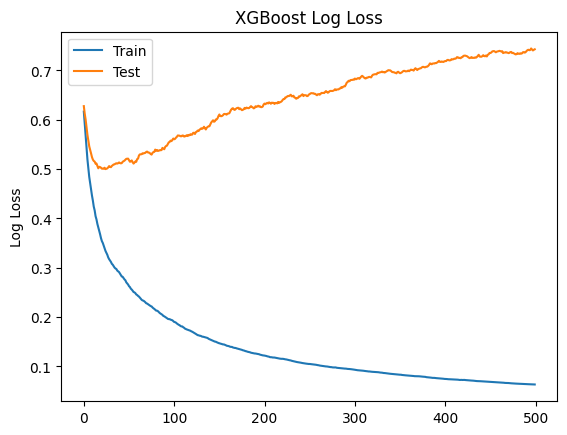

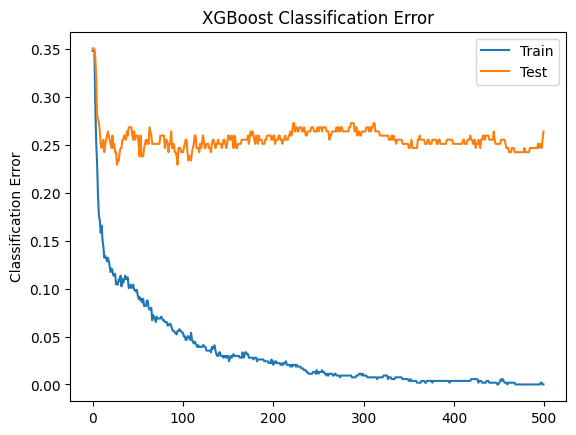

In [ ]:
from matplotlib import pyplot
# make predictions for test data
y_pred = model.predict(X_test)
predictions = [round(value) for value in y_pred]

# evaluate predictions
accuracy = accuracy_score(y_test, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))
# retrieve performance metrics
results = model.evals_result()
epochs = len(results['validation_0']['error'])
x_axis = range(0, epochs)
# plot log loss
fig, ax = pyplot.subplots()
ax.plot(x_axis, results['validation_0']['logloss'], label='Train')
ax.plot(x_axis, results['validation_1']['logloss'], label='Test')
ax.legend()
pyplot.ylabel('Log Loss')
pyplot.title('XGBoost Log Loss')
pyplot.show()
# plot classification error
fig, ax = pyplot.subplots()
ax.plot(x_axis, results['validation_0']['error'], label='Train')
ax.plot(x_axis, results['validation_1']['error'], label='Test')
ax.legend()
pyplot.ylabel('Classification Error')
pyplot.title('XGBoost Classification Error')
pyplot.show()

The classification error plot distinctly demonstrates a consistent decrease with each boosting iteration for both the training set. However, there is clearly overfitting happening as the number of rounds goes higher.

**Let's Experiment**

**Set an Early stopping rate**

In [ ]:
import xgboost as xgb
from sklearn.metrics import classification_report,confusion_matrix, accuracy_score

model = xgb.XGBClassifier(max_depth=12,
                        subsample=0.33,
                        objective='binary:logistic',
                        n_estimators=300,
                        learning_rate = 0.1,
                        eval_metric=["error", "logloss"],
                        early_stopping_rounds=20)
eval_set = [(X_train, y_train), (X_test, y_test)]
model.fit(X_train, y_train.values.ravel(), eval_set=eval_set, verbose=False)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=20,
              enable_categorical=False, eval_metric=['error', 'logloss'],
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.1, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=12,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=300,
              n_jobs=None, num_parallel_tree=None, random_state=None, ...)

Accuracy: 74.89%


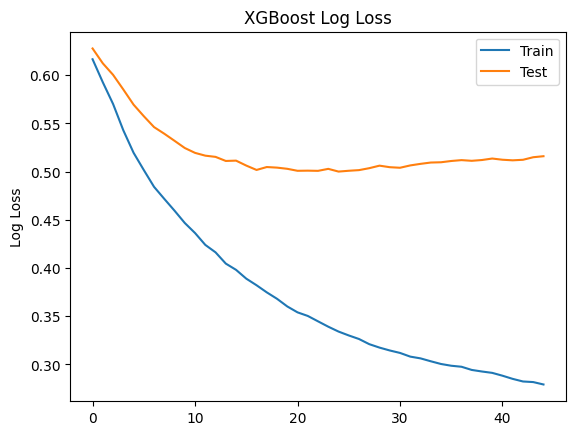

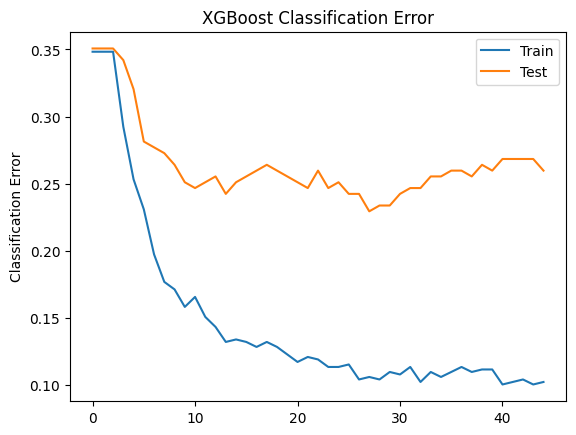

In [ ]:
from matplotlib import pyplot
# make predictions for test data
y_pred = model.predict(X_test)
predictions = [round(value) for value in y_pred]

# evaluate predictions
accuracy = accuracy_score(y_test, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))
# retrieve performance metrics
results = model.evals_result()
epochs = len(results['validation_0']['error'])
x_axis = range(0, epochs)
# plot log loss
fig, ax = pyplot.subplots()
ax.plot(x_axis, results['validation_0']['logloss'], label='Train')
ax.plot(x_axis, results['validation_1']['logloss'], label='Test')
ax.legend()
pyplot.ylabel('Log Loss')
pyplot.title('XGBoost Log Loss')
pyplot.show()
# plot classification error
fig, ax = pyplot.subplots()
ax.plot(x_axis, results['validation_0']['error'], label='Train')
ax.plot(x_axis, results['validation_1']['error'], label='Test')
ax.legend()
pyplot.ylabel('Classification Error')
pyplot.title('XGBoost Classification Error')
pyplot.show()

    train-error-mean  train-error-std  test-error-mean  test-error-std
45          0.135417         0.003320         0.244792        0.007366
46          0.136719         0.003189         0.242188        0.005524
47          0.136068         0.001841         0.240885        0.004872
48          0.134115         0.002436         0.247396        0.001841
49          0.134766         0.002762         0.243490        0.001841


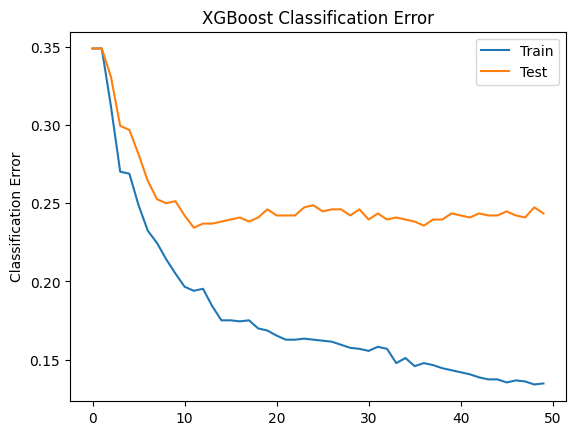

In [ ]:
import xgboost as xgb
import numpy as np


#Converting the data to DMatrix
data = xgb.DMatrix(X, label=y)

#Hyperparameters
params = {
    'objective': 'binary:logistic',
    'max_depth': 3,
    'learning_rate': 0.1,
}

#Performing cross-validation
cv_results = xgb.cv(params, data, num_boost_round=50, nfold=3,metrics='error', seed=42)

#Printing the results
print(cv_results.tail())

fig, ax = pyplot.subplots()
ax.plot(cv_results['train-error-mean'],label='Train')
ax.plot(cv_results['test-error-mean'], label='Test')
ax.legend()
pyplot.ylabel('Classification Error')
pyplot.title('XGBoost Classification Error')
pyplot.show()

**Hyper Parameter  Tuning**

In [ ]:
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV

params = {'learning_rate': [0.1, 0.25, 0.4],
          'max_depth': [5,10,12],
          'subsample': [0.2,0.3,0.5, 0.7],
          'n_estimators': [5,10,15,20,25,30,35,40,50,150,300]}


random_search = RandomizedSearchCV(model, param_distributions=params, n_iter=10, cv=5, n_jobs=1, verbose=1,random_state=42)
random_search.fit(X_train, y_train, eval_set=[(X_test, y_test)]) #typically, should have a validation set in eval_set, different from the training and testing data.
                                                                 #For this notebook we are using test set since the dataset is small.

print("test_score - " + str(random_search .score(X_test, y_test)))

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[0]	validation_0-error:0.35065	validation_0-logloss:0.63045
[1]	validation_0-error:0.35065	validation_0-logloss:0.61194
[2]	validation_0-error:0.35065	validation_0-logloss:0.59844
[3]	validation_0-error:0.31169	validation_0-logloss:0.58553
[4]	validation_0-error:0.29870	validation_0-logloss:0.57878
[5]	validation_0-error:0.29870	validation_0-logloss:0.56170
[6]	validation_0-error:0.27273	validation_0-logloss:0.55077
[7]	validation_0-error:0.27273	validation_0-logloss:0.54423
[8]	validation_0-error:0.25974	validation_0-logloss:0.54179
[9]	validation_0-error:0.27273	validation_0-logloss:0.54130
[10]	validation_0-error:0.27706	validation_0-logloss:0.54022
[11]	validation_0-error:0.27706	validation_0-logloss:0.53954
[12]	validation_0-error:0.28139	validation_0-logloss:0.53904
[13]	validation_0-error:0.29004	validation_0-logloss:0.53643
[14]	validation_0-error:0.29004	validation_0-logloss:0.53651
[15]	validation_0-error:0.30303	va

In [ ]:
print(random_search.best_score_)

0.7765662859120803


In [ ]:
import xgboost as xgb
from sklearn.metrics import classification_report,confusion_matrix, accuracy_score

model = xgb.XGBClassifier(max_depth=12,
                        subsample=0.33,
                        objective='binary:logistic',
                        n_estimators=300,
                        learning_rate = 0.1,
                        early_stopping_rounds=15,
                        eval_metric=["error", "logloss"])
eval_set = [(X_train, y_train), (X_test, y_test)]
model.fit(X_train, y_train.values.ravel(), eval_set=eval_set, verbose=False)
y_pred=model.predict(X_test)
print("train_score - " + str(model .score(X_train, y_train)))
print("test_score - " + str(model .score(X_test, y_test)))

train_score - 0.8864059590316573
test_score - 0.7489177489177489


**Evaluation**

In [ ]:
from sklearn.metrics import f1_score, accuracy_score, precision_score, recall_score
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
cm=confusion_matrix(y_test,y_pred)
print(cm)
f1 = f1_score(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)

# Print the metrics
print("F1 Score: ", np.round(f1,3))
print("Accuracy: ", np.round(accuracy,3))
print("Precision:", np.round(precision,3))
print("Recall:   ", np.round(recall,3))
tree_auc = roc_auc_score(y_test, model.predict_proba(X_test)[:,1])
print("ROC AUC:", np.round(tree_auc,3))


[[132  18]
 [ 40  41]]
F1 Score:  0.586
Accuracy:  0.749
Precision: 0.695
Recall:    0.506
ROC AUC: 0.815


##Over-all Evaluation

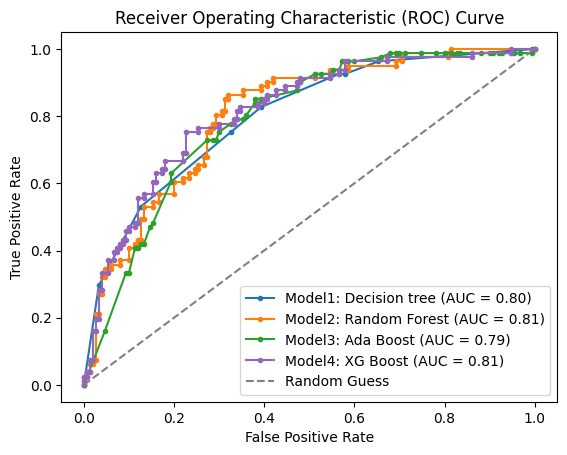

In [ ]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

#  dt2, rf1, abc, and model are your respective models

tree_fpr, tree_tpr, _ = roc_curve(y_test, dt2.predict_proba(X_test)[:, 1])
rf_fpr, rf_tpr, _ = roc_curve(y_test, rf1.predict_proba(X_test)[:, 1])
gb_fpr, gb_tpr, _ = roc_curve(y_test, abc.predict_proba(X_test)[:, 1])
xgb_fpr, xgb_tpr, _ = roc_curve(y_test, model.predict_proba(X_test)[:, 1])

tree_auc = auc(tree_fpr, tree_tpr)
rf_auc = auc(rf_fpr, rf_tpr)
gb_auc = auc(gb_fpr, gb_tpr)
xgb_auc = auc(xgb_fpr, xgb_tpr)

plt.plot(tree_fpr, tree_tpr, marker='.', color='C0', label=f'Model1: Decision tree (AUC = {tree_auc:.2f})')
plt.plot(rf_fpr, rf_tpr, marker='.', color='C1', label=f'Model2: Random Forest (AUC = {rf_auc:.2f})')
plt.plot(gb_fpr, gb_tpr, marker='.', color='C2', label=f'Model3: Ada Boost (AUC = {gb_auc:.2f})')
plt.plot(xgb_fpr, xgb_tpr, marker='.', color='C4', label=f'Model4: XG Boost (AUC = {xgb_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--', label='Random Guess')

plt.legend()
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.show()


# Time Series Forecasting with XGBoost and LightGBM

The very first thing we have to do is get a good understanding of the data and preprocess them if needed

In [ ]:
df = pd.read_csv("london_energy.csv")
print(df.isna().sum())
df.head()

LCLid    0
Date     0
KWH      1
dtype: int64


LCLid        Date     KWH
0  MAC000002  2012-10-12   7.098
1  MAC000002  2012-10-13  11.087
2  MAC000002  2012-10-14  13.223
3  MAC000002  2012-10-15  10.257
4  MAC000002  2012-10-16   9.769

The `LCLid` is a unique string that identifies each household, the `Date` is self-explanatory, the `KWH` is the total number of kilowatt-hours spent on that date and there are no missing values at all.

Since we want to predict the consumption in a general fashion and not per household, we need to group the results by date and average the kilowatt-hours.

In [ ]:
# Group by 'Date' and calculate the mean 'KWH' consumption
df_avg_consumption = df.groupby("Date")["KWH"].mean()

# Create a new DataFrame with 'date' and 'consumption' columns
df_avg_consumption = pd.DataFrame({
    "date": df_avg_consumption.index.tolist(),
    "consumption": df_avg_consumption.values.tolist()
})

# Convert the 'date' column to datetime, handling errors
df_avg_consumption["date"] = pd.to_datetime(df_avg_consumption["date"], errors='coerce')

# Remove rows with invalid dates (NaT)
df_avg_consumption = df_avg_consumption.dropna()

# Print the minimum and maximum dates
print(f"From {df_avg_consumption['date'].min()}")
print(f"To: {df_avg_consumption['date'].max()}")

From 2011-11-23 00:00:00
To: 2014-02-28 00:00:00


<ipython-input-65-e3c688f2ea73>:11: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df_avg_consumption["date"] = pd.to_datetime(df_avg_consumption["date"], errors='coerce')


At this point, it would be great if we could have a look at the way consumption changes through the years. A line plot can expose this:

<Axes: xlabel='date'>

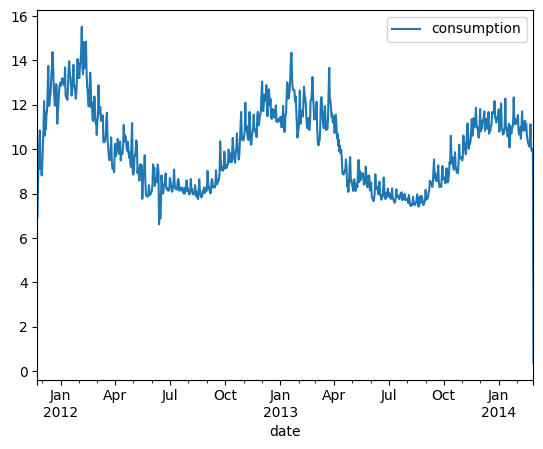

In [ ]:
df_avg_consumption.plot(x="date", y="consumption")

The seasonality characteristic is pretty obvious. During the winter months we observe high demands in energy, while throughout the summer the consumption is at the lowest levels. This behavior repeats itself for every year in the dataset, with different high and low values. To visualize the fluctuation in the span of a year we can do:

<Axes: xlabel='date'>

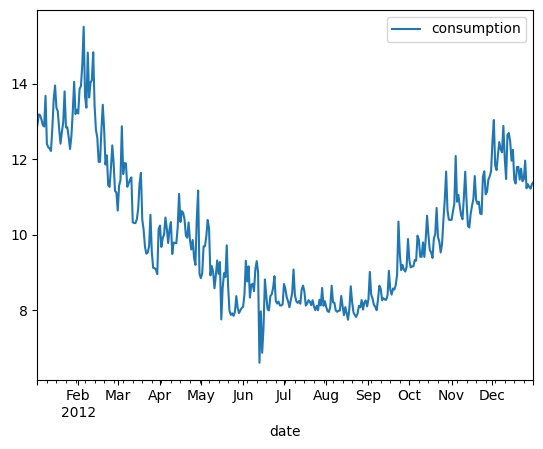

In [ ]:
df_avg_consumption.query("date > '2012-01-01' & date < '2013-01-01'").plot(x="date", y="consumption")

To train a model like XGBoost and LightGB we need to create the features ourselves. Currently, we have only one feature: the full date. We can extract different features based on the full date such as the day of the week, the day of the year, the month and others. To achieve this we can do:

In [ ]:
df_avg_consumption["day_of_week"] = df_avg_consumption["date"].dt.dayofweek
df_avg_consumption["day_of_year"] = df_avg_consumption["date"].dt.dayofyear
df_avg_consumption["month"] = df_avg_consumption["date"].dt.month
df_avg_consumption["quarter"] = df_avg_consumption["date"].dt.quarter
df_avg_consumption["year"] = df_avg_consumption["date"].dt.year

df_avg_consumption.head()

date  consumption  day_of_week  day_of_year  month  quarter  year
1 2011-11-23     6.952692            2          327     11        4  2011
2 2011-11-24     8.536480            3          328     11        4  2011
3 2011-11-25     9.499781            4          329     11        4  2011
4 2011-11-26    10.267707            5          330     11        4  2011
5 2011-11-27    10.850805            6          331     11        4  2011

So, the `date` feature is currently redundant. Before dropping it, we will use it to split our dataset into training and testing sets.

Contrary to the conventional training, in time series we can’t just split the set in a random way because the order of the data is extremely important and we are only allowed to incorporate previous data. Otherwise, we might be prompted to predict a value while taking into consideration future values too!

The dataset contains almost 2.5 years of data, so for the testing set we will use only the last 6 months. If the training set was bigger we would have used the entire last year as the testing set.

In [ ]:
training_mask = df_avg_consumption["date"] < "2013-07-28"
training_data = df_avg_consumption.loc[training_mask]
print(training_data.shape)

testing_mask = df_avg_consumption["date"] >= "2013-07-28"
testing_data = df_avg_consumption.loc[testing_mask]
print(testing_data.shape)

(613, 7)
(216, 7)


To visualize again the split and discriminate between the training and testing sets we can plot:

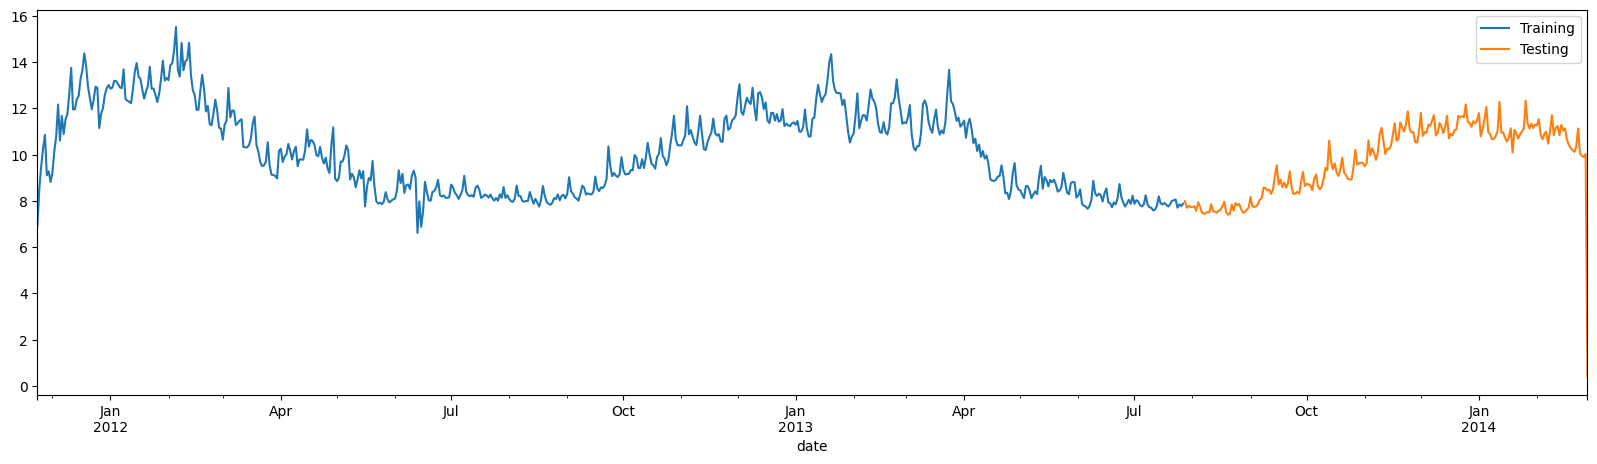

In [ ]:
figure, ax = plt.subplots(figsize=(20, 5))
training_data.plot(ax=ax, label="Training", x="date", y="consumption")
testing_data.plot(ax=ax, label="Testing", x="date", y="consumption")
plt.show()

Now we can drop the `date` feature and create the training and testing sets:

In [ ]:
# Dropping unnecessary `date` column
training_data = training_data.drop(columns=["date"])
testing_dates = testing_data["date"]
testing_data = testing_data.drop(columns=["date"])

X_train = training_data[["day_of_week","day_of_year","month","quarter","year"]]
y_train = training_data["consumption"]

X_test = testing_data[["day_of_week","day_of_year","month","quarter","year"]]
y_test = testing_data["consumption"]

**Training the Models**

The hyperparameter optimization will be done with grid search. The grid search takes parameters and some values as configuration and tries out every possible combination. The parameter configuration that achieves the best result, will be the one to form the best estimator.

Grid search utilizes cross validation too, so it is crucial to provide an appropriate splitting mechanism. Again, due to the nature of the problem we can’t just use plain k-fold cross validation. Scikit learn provides the TimeSeriesSplit method which splits the data incrementally in a respectful manner in terms of continuity.

In [ ]:
from xgboost import XGBRegressor
import lightgbm as lgb
from sklearn.model_selection import TimeSeriesSplit, GridSearchCV

# XGBoost
cv_splitXG = TimeSeriesSplit(n_splits=4,test_size=100)
modelXG = XGBRegressor(random_state=1)
parametersXG = {
    "max_depth": [3, 5, 10], #, 4, 6
    "learning_rate": [0.01, 0.05, 0.1], #, 0.2, 0.3
    "n_estimators": [100, 300, 500], #, 700, 900, 1000
    "colsample_bytree": [0.3, 0.5, 0.7]
}


#:32-1:02 to run
grid_searchXG = GridSearchCV(estimator=modelXG, param_grid=parametersXG, cv=cv_splitXG, n_jobs=-1, verbose=1)
grid_searchXG.fit(X_train, y_train)

/usr/local/lib/python3.11/dist-packages/dask/dataframe/__init__.py:42: FutureWarning: 
Dask dataframe query planning is disabled because dask-expr is not installed.

You can install it with `pip install dask[dataframe]` or `conda install dask`.
This will raise in a future version.

  warnings.warn(msg, FutureWarning)


Fitting 4 folds for each of 81 candidates, totalling 324 fits


GridSearchCV(cv=TimeSeriesSplit(gap=0, max_train_size=None, n_splits=4, test_size=100),
             estimator=XGBRegressor(base_score=None, booster=None,
                                    callbacks=None, colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None, device=None,
                                    early_stopping_rounds=None,
                                    enable_categorical=False, eval_metric=None,
                                    feature_types=None, gamma=None,
                                    grow_policy=None, impo...
                                    max_cat_to_onehot=None, max_delta_step=None,
                                    max_depth=None, max_leaves=None,
                                    min_child_weight=None, missing=nan,
                                    monotone_constraints=None,
                                    multi_strategy=None, n_estimators=None,
                                    n_jobs=None, num_parallel_tree=None,
                                    random_state=1, ...),
             n_jobs=-1,
             param_grid={'colsample_bytree': [0.3, 0.5, 0.7],
                         'learning_rate': [0.01, 0.05, 0.1],
                         'max_depth': [3, 5, 10],
                         'n_estimators': [100, 300, 500]},
             verbose=1)

In [ ]:
grid_searchXG.best_params_

{'colsample_bytree': 0.7,
 'learning_rate': 0.01,
 'max_depth': 5,
 'n_estimators': 300}

In [ ]:
# LGBM
cv_splitLGBM = TimeSeriesSplit(n_splits=4,test_size=100)
modelLGBM = lgb.LGBMRegressor(random_state=1)
parametersLGBM = {
    "max_depth": [3, 4, 5], #, 6 , 10
    "num_leaves": [10, 20, 40], #, 30, 100, 120
    "learning_rate": [ 0.01, 0.05 , 0.1], # 0.2, 0.3,
    "n_estimators": [50, 300, 500], #, 100, 700, 900, 1000
    "colsample_bytree": [0.3, 0.5, 0.7] #, 1
}

# 1:46-2:56 to run
grid_searchLGBM = GridSearchCV(estimator=modelLGBM, param_grid=parametersLGBM, cv=cv_splitLGBM, n_jobs=-1, verbose=1)
grid_searchLGBM.fit(X_train, y_train)

Fitting 4 folds for each of 243 candidates, totalling 972 fits
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000077 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 234
[LightGBM] [Info] Number of data points in the train set: 613, number of used features: 5
[LightGBM] [Info] Start training from score 10.156810
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -in

GridSearchCV(cv=TimeSeriesSplit(gap=0, max_train_size=None, n_splits=4, test_size=100),
             estimator=LGBMRegressor(random_state=1), n_jobs=-1,
             param_grid={'colsample_bytree': [0.3, 0.5, 0.7],
                         'learning_rate': [0.01, 0.05, 0.1],
                         'max_depth': [3, 4, 5], 'n_estimators': [50, 300, 500],
                         'num_leaves': [10, 20, 40]},
             verbose=1)

In [ ]:
grid_searchLGBM.best_params_

{'colsample_bytree': 0.3,
 'learning_rate': 0.1,
 'max_depth': 4,
 'n_estimators': 50,
 'num_leaves': 10}

**Evaluation**

To evaluate the best estimator on the test set we will calculate some metrics. These are the Mean Absolute Error or MAE, the Mean Squared Error or MSE and the Mean Absolute Percentage Error or MAPE. Each of these provide a different perspective on the actual performance of the trained model. Additionally, we will plot a line diagram to better visualize the performance of the model.

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error,\
  mean_squared_error

def evaluate_model(y_test, prediction):
  print(f"MAE: {mean_absolute_error(y_test, prediction)}")
  print(f"MSE: {mean_squared_error(y_test, prediction)}")
  print(f"MAPE: {mean_absolute_percentage_error(y_test, prediction)}")

def plot_predictions(testing_dates, y_test, prediction):
  df_test = pd.DataFrame({"date": testing_dates, "actual": y_test, "prediction": prediction })
  figure, ax = plt.subplots(figsize=(10, 5))
  df_test.plot(ax=ax, label="Actual", x="date", y="actual")
  df_test.plot(ax=ax, label="Prediction", x="date", y="prediction")
  plt.legend(["Actual", "Prediction"])
  plt.show()

Even though XGBoost predicts more accurately the energy consumption during the winter months, to strictly quantify and compare the performances we need to calculate the error metrics. By directly comparing these metrics, it is more than obvious that XGBoost outperforms LightGBM in all cases.

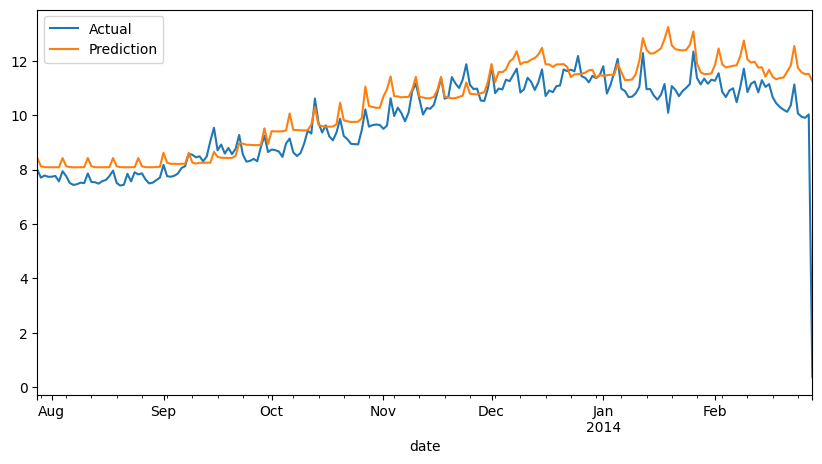

MAE: 0.6735199084251501
MSE: 1.1300802557505507
MAPE: 0.1952731289757317


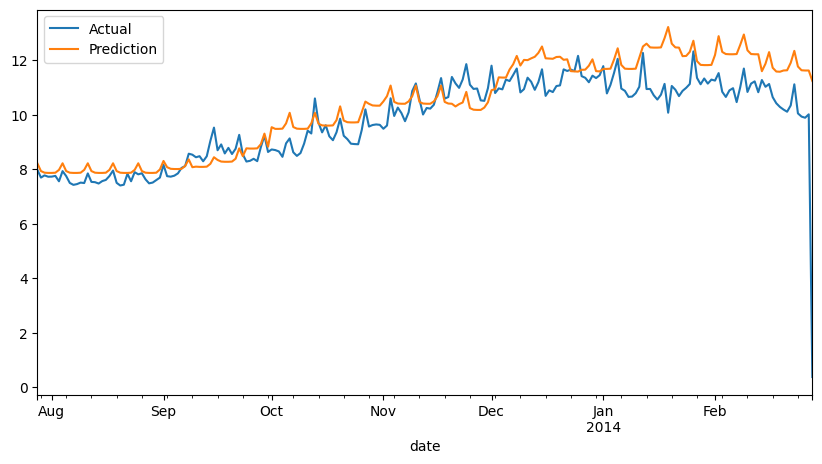

MAE: 0.7122021092508596
MSE: 1.2357773313609373
MAPE: 0.19748164898510812


In [ ]:
# Evaluating GridSearch results
predictionXG = grid_searchXG.predict(X_test)
predictionLGBM = grid_searchLGBM.predict(X_test)

#XGBoost
plot_predictions(testing_dates, y_test, predictionXG)
evaluate_model(y_test, predictionXG)

#LightGBM
plot_predictions(testing_dates, y_test, predictionLGBM)
evaluate_model(y_test, predictionLGBM)

**Preprocessing Weather Data**

The model performs relatively well, but is there a way to improve it even further? The answer is yes. There are many different tips and tricks available that can be employed in order to achieve better results. One of them is to use auxiliary features that are correlated directly or indirectly to energy consumption. For example, the weather data can play a decisive role when it comes to predicting energy demands. That’s why we choose to enhance our dataset with weather data from the London Weather Dataset.

First let’s take a look at the structure of the data:

In [ ]:
df_weather = pd.read_csv("london_weather.csv")
print(df_weather.isna().sum())
df_weather.head()

date                   0
cloud_cover           19
sunshine               0
global_radiation      19
max_temp               6
mean_temp             36
min_temp               2
precipitation          6
pressure               4
snow_depth          1441
dtype: int64


date  cloud_cover  sunshine  global_radiation  max_temp  mean_temp  \
0  19790101          2.0       7.0              52.0       2.3       -4.1   
1  19790102          6.0       1.7              27.0       1.6       -2.6   
2  19790103          5.0       0.0              13.0       1.3       -2.8   
3  19790104          8.0       0.0              13.0      -0.3       -2.6   
4  19790105          6.0       2.0              29.0       5.6       -0.8   

   min_temp  precipitation  pressure  snow_depth  
0      -7.5            0.4  101900.0         9.0  
1      -7.5            0.0  102530.0         8.0  
2      -7.2            0.0  102050.0         4.0  
3      -6.5            0.0  100840.0         2.0  
4      -1.4            0.0  102250.0         1.0

There are various missing data that need to be filled in. Filling missing data is not trivial and depends on each case. Since we have weather data where each day depends on the previous and next days, we will fill those values by interpolating. Also, we will convert the `date` column to `datetime` and, then, merge the two dataframes in order to get one enhanced dataframe.

In [ ]:
# Parsing dates
df_weather["date"] = pd.to_datetime(df_weather["date"], format="%Y%m%d")

# Filling missing values through interpolation
df_weather = df_weather.interpolate(method="ffill")

# Enhancing consumption dataset with weather information (combining the two datasets)
df_avg_consumption = df_avg_consumption.merge(df_weather, how="inner", on="date")
df_avg_consumption.head()

<ipython-input-82-722f5cde8c28>:5: FutureWarning: DataFrame.interpolate with method=ffill is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_weather = df_weather.interpolate(method="ffill")


date  consumption  day_of_week  day_of_year  month  quarter  year  \
0 2011-11-23     6.952692            2          327     11        4  2011   
1 2011-11-24     8.536480            3          328     11        4  2011   
2 2011-11-25     9.499781            4          329     11        4  2011   
3 2011-11-26    10.267707            5          330     11        4  2011   
4 2011-11-27    10.850805            6          331     11        4  2011   

   cloud_cover  sunshine  global_radiation  max_temp  mean_temp  min_temp  \
0          7.0       2.0              35.0      13.5        6.8       2.6   
1          3.0       2.0              35.0      12.5        8.6       3.7   
2          3.0       5.0              52.0      14.0       11.0       9.5   
3          4.0       0.7              24.0      13.9       10.2       6.3   
4          3.0       5.9              55.0      13.2       11.8       9.7   

   precipitation  pressure  snow_depth  
0            0.2  102720.0         0.0  
1            0.2  102710.0         0.0  
2            0.0  102450.0         0.0  
3            0.0  102580.0         0.0  
4            0.0  102130.0         0.0

In [ ]:
training_mask = df_avg_consumption["date"] < "2013-07-28"
training_data = df_avg_consumption.loc[training_mask]
print(training_data.shape)

testing_mask = df_avg_consumption["date"] >= "2013-07-28"
testing_data = df_avg_consumption.loc[testing_mask]
print(testing_data.shape)

(613, 16)
(216, 16)


In [ ]:
# Dropping unnecessary `date` column
training_data = training_data.drop(columns=["date"])
testing_dates = testing_data["date"]
testing_data = testing_data.drop(columns=["date"])

X_train = training_data[["day_of_week", "day_of_year", "month", "quarter", "year",\
                         "cloud_cover", "sunshine", "global_radiation", "max_temp",\
                         "mean_temp", "min_temp", "precipitation", "pressure",\
                         "snow_depth"]]
y_train = training_data["consumption"]


X_test = testing_data[["day_of_week", "day_of_year", "month", "quarter", "year",\
                         "cloud_cover", "sunshine", "global_radiation", "max_temp",\
                         "mean_temp", "min_temp", "precipitation", "pressure",\
                         "snow_depth"]]
y_test = testing_data["consumption"]

There is no need to update the training steps.

In [ ]:
# XGBoost
cv_splitXG = TimeSeriesSplit(n_splits=4,test_size=100)
modelXG = XGBRegressor(random_state=1)
parametersXG = {
    "max_depth": [3, 5, 10], #, 4, 6
    "learning_rate": [0.01, 0.05, 0.1], #, 0.2, 0.3
    "n_estimators": [100, 300, 500], #, 700, 900, 1000
    "colsample_bytree": [0.3, 0.5, 0.7]
}


#1:33-1:45 to run
grid_searchXG = GridSearchCV(estimator=modelXG, param_grid=parametersXG, cv=cv_splitXG, n_jobs=-1, verbose=1)
grid_searchXG.fit(X_train, y_train)

Fitting 4 folds for each of 81 candidates, totalling 324 fits


GridSearchCV(cv=TimeSeriesSplit(gap=0, max_train_size=None, n_splits=4, test_size=100),
             estimator=XGBRegressor(base_score=None, booster=None,
                                    callbacks=None, colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None, device=None,
                                    early_stopping_rounds=None,
                                    enable_categorical=False, eval_metric=None,
                                    feature_types=None, gamma=None,
                                    grow_policy=None, impo...
                                    max_cat_to_onehot=None, max_delta_step=None,
                                    max_depth=None, max_leaves=None,
                                    min_child_weight=None, missing=nan,
                                    monotone_constraints=None,
                                    multi_strategy=None, n_estimators=None,
                                    n_jobs=None, num_parallel_tree=None,
                                    random_state=1, ...),
             n_jobs=-1,
             param_grid={'colsample_bytree': [0.3, 0.5, 0.7],
                         'learning_rate': [0.01, 0.05, 0.1],
                         'max_depth': [3, 5, 10],
                         'n_estimators': [100, 300, 500]},
             verbose=1)

In [ ]:
grid_searchXG.best_params_

{'colsample_bytree': 0.5,
 'learning_rate': 0.01,
 'max_depth': 3,
 'n_estimators': 500}

In [ ]:
# LGBM
cv_splitLGBM = TimeSeriesSplit(n_splits=4,test_size=100)
modelLGBM = lgb.LGBMRegressor(random_state=1)
parametersLGBM = {
    "max_depth": [3, 4, 5], #, 6 , 10
    "num_leaves": [10, 20, 40], #, 30, 100, 120
    "learning_rate": [ 0.01, 0.05 , 0.1], # 0.2, 0.3,
    "n_estimators": [50, 300, 500], #, 100, 700, 900, 1000
    "colsample_bytree": [0.3, 0.5, 0.7] #, 1
}

# 2:01-3:04 to run
grid_searchLGBM = GridSearchCV(estimator=modelLGBM, param_grid=parametersLGBM, cv=cv_splitLGBM, n_jobs=-1, verbose=1)
grid_searchLGBM.fit(X_train, y_train)

Fitting 4 folds for each of 243 candidates, totalling 972 fits
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000173 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1164
[LightGBM] [Info] Number of data points in the train set: 613, number of used features: 13
[LightGBM] [Info] Start training from score 10.156810
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf


GridSearchCV(cv=TimeSeriesSplit(gap=0, max_train_size=None, n_splits=4, test_size=100),
             estimator=LGBMRegressor(random_state=1), n_jobs=-1,
             param_grid={'colsample_bytree': [0.3, 0.5, 0.7],
                         'learning_rate': [0.01, 0.05, 0.1],
                         'max_depth': [3, 4, 5], 'n_estimators': [50, 300, 500],
                         'num_leaves': [10, 20, 40]},
             verbose=1)

In [ ]:
grid_searchLGBM.best_params_

{'colsample_bytree': 0.5,
 'learning_rate': 0.1,
 'max_depth': 5,
 'n_estimators': 50,
 'num_leaves': 10}

 After training the models on the new dataset, we get the following results:

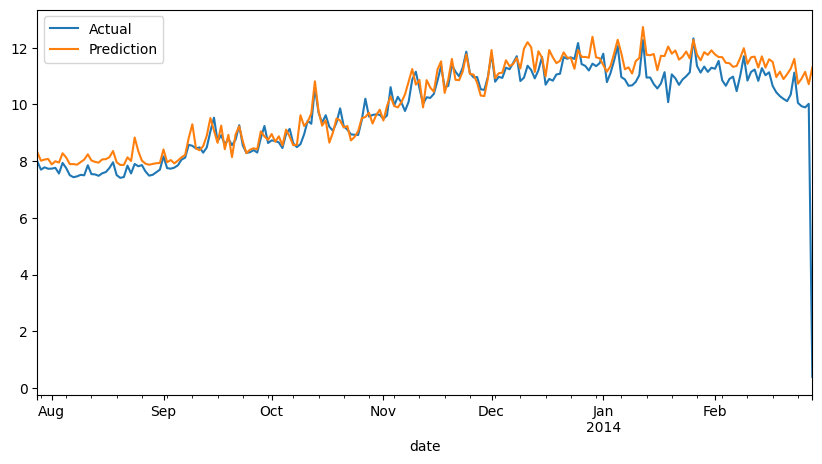

MAE: 0.43129097016463763
MSE: 0.7814414886504532
MAPE: 0.171327115243205


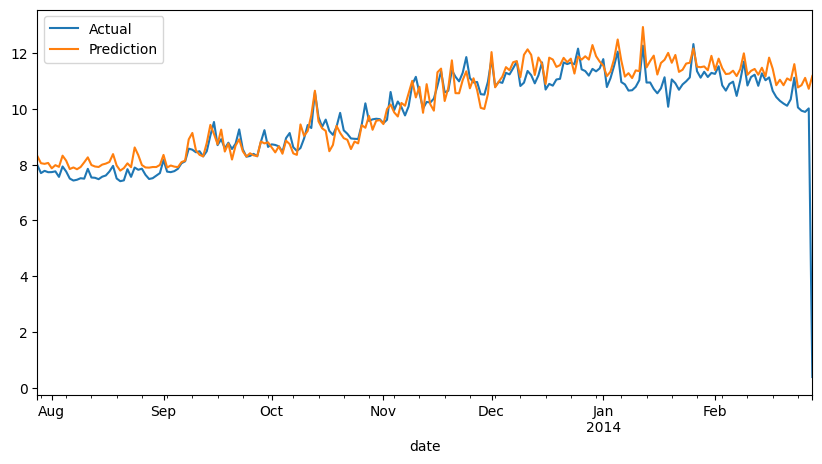

MAE: 0.4240232341017152
MSE: 0.7550035668160954
MAPE: 0.16903295858988407


In [ ]:
# Evaluating GridSearch results
predictionXG = grid_searchXG.predict(X_test)
predictionLGBM = grid_searchLGBM.predict(X_test)

#XGBoost
plot_predictions(testing_dates, y_test, predictionXG)
evaluate_model(y_test, predictionXG)

#LightGBM
plot_predictions(testing_dates, y_test, predictionLGBM)
evaluate_model(y_test, predictionLGBM)

The weather data improve the performance in both models by a significant margin. In particular, in the XGBoost scenario the MAE is reduced by almost 40%, while the MAPE moved from 19.2% to 16.6%. For LightGBM, the MAE has dropped by about 41% and the MAPE declined from 19.7% to 16.7%.

**Conclusion & Future Steps**

Ensemble models are very powerful machine learning tools that can be utilized in the time series forecasting problem. In this article, we’ve seen how this is done in the case of energy consumption. At first, we trained our models by using solely the date factor. Later on, we took into consideration additional data in the training process that are correlated with the task at hand in order to boost the results in a notable way.

The performance can be improved even more by incorporating the so-called lag features or trying different hyperparameter optimization techniques such as randomized search or Bayesian optimization.